# Dataiku Data Scientist Technical Assessment and Presentation

*Ronan Tardif*

*September 6th, 2023*

## Context

The United States Census Bureau leads the country’s Federal Statistical System; its primary responsibility is
to collect demographic and economic data about America to help inform strategic initiatives. Every ten
years, the census is conducted to collect and organize information regarding the US population to effectively
allocate billions of dollars of funding to various endeavors (e.g., the building and maintenance of hospitals,
schools, fire departments, transportation infrastructure, etc.). Additionally, the collection of census
information helps to examine the demographic characteristics of subpopulations across the country.

In this project, our goal is to predict an individual's salary bucket. Specifically, we want to classify whether a person falls into the high-salary category, earning more than $50,000 annually, or the low-salary category, earning less than $50,000 a year.

By employing this approach, we can identify the most significant features that contribute to income disparities. This, in turn, can provide insights into potential public initiatives aimed at addressing inequalities.

To achieve this goal, we have at our disposal a diverse set of features, including information about age, race, and education levels of individuals. Our project towards building an effective salary predictor will unfold in several key stages:

1. Setting Up Our Environment: We will begin by creating our working environment and importing the relevant data.

2. Exploring the Data: Next, we'll delve into the data itself. This involves understanding the nature of our dataset, the number and types of features it contains, and gaining insights into its distribution This step is essential for gaining a deeper understanding of the data and evaluating its relevance for the project's next steps, or for making any necessary refinements.

3. Feature Selection: Armed with a deeper understanding of our data, we'll carefully evaluate each feature to decide which ones are most suitable for our classification model. This step can lead to impact the performance of our predictor.

4. Feature Engineering: Feature engineering involves tasks such as reclassifying our features and generating new variables. In this section, our primary focus will be on reclassifying the data.

5. Building the Classification Model: The final step will involve constructing a classification model. We'll train and test this model, fine-tuning it as needed to ensure optimal performance. The results we obtain will shed light on our ability to predict salary buckets accurately.

## Set up the environnement

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

### Import train & test datasets

In this section, we will import the necessary data files for our analysis. We have three files to work with:

- **Training Data**: `census_income_learn.csv` - This dataset will be used to train our machine learning model.
- **Test Data**: `census_income_test.csv` - We will use this dataset to evaluate the model's performance.
- **Metadata**: `census_income_metadata.csv` - This file contains basic information about variables, which we will use to retrieve column details.

Let's start by importing these datasets using Python's pandas library:

In [2]:
train_data = pd.read_csv("data/us_census_full/census_income_learn.csv", sep=",")
test_data = pd.read_csv("data/us_census_full/census_income_test.csv" , sep=",")

### Column Retrieval and Standardization

The code below helps us retrieving columns names, which are not present in our datasets. Instead, it sources these column names from 'census_income_metadata.txt'. Through careful processing of this metadata source, the code effectively extracts and standardizes the column names. This standardization process ensures that we have a consistent and well-structured set of column names, making them more suitable for data analysis and modeling purposes.


In [3]:
# Define the number of lines to skip at the beginning of the file
lines_to_skip = 142

# Open the metadata file for reading
with open('data/us_census_full/census_income_metadata.txt') as f:
    # Skip the specified number of lines at the beginning of the file
    for _ in range(lines_to_skip):
        next(f)

    # Initialize an empty list to store column names
    colnames_list = []

    # Loop through each line in the file
    for line in f:
        # Split each line using ":" and take the first part (the column name)
        colname = line.split(":")[0]
        
        # Append the column name to the list
        colnames_list.append(colname)

    # Remove any elements from the list that contain "|" (e.g., "| instance weight" line)
    colnames_list = [col for col in colnames_list if "|" not in col]

# Define a dictionary for character transformations
dict_transfo = {' ': '_', 
                "'": '',}

# Use str.translate to apply character transformations to each column name
colnames_list = [col.translate(str.maketrans(dict_transfo)) for col in colnames_list]

#colnames_list[:5],colnames_list[-5:]


The code below assigns column names from colnames_list to the train_data and test_data DataFrames, adding a "target" column to both datasets.

In [4]:
train_data.columns = colnames_list + ["target"]
test_data.columns = colnames_list + ["target"]

### Assigning Data Types to Columns

Assigning data types to dataset columns might be a useful step. It ensures compatibility, optimizes memory, speeds up computations, facilitates encoding, maintains data consistency, and supports feature engineering.


#### Features data types specification

In [5]:
dict_columns_format ={'age': 'int64',
                   'class_of_worker': 'category',
                   'detailed_industry_recode': 'category',
                   'detailed_occupation_recode': 'category',
                   'education': 'category',
                   'wage_per_hour': 'int64',
                   'enroll_in_edu_inst_last_wk': 'category',
                   'marital_stat': 'category',
                   'major_industry_code': 'category',
                   'major_occupation_code': 'category',
                   'race': 'category',
                   'hispanic_origin': 'category',
                   'sex': 'category',
                   'member_of_a_labor_union': 'category',
                   'reason_for_unemployment': 'category',
                   'full_or_part_time_employment_stat': 'category',
                   'capital_gains': 'int64',
                   'capital_losses': 'int64',
                   'dividends_from_stocks': 'int64',
                   'tax_filer_stat': 'category',
                   'region_of_previous_residence': 'category',
                   'state_of_previous_residence': 'category',
                   'detailed_household_and_family_stat': 'category',
                   'detailed_household_summary_in_household': 'category',
                   'instance_weight': 'float64',
                   'migration_code-change_in_msa': 'category',
                   'migration_code-change_in_reg': 'category',
                   'migration_code-move_within_reg': 'category',
                   'live_in_this_house_1_year_ago': 'category',
                   'migration_prev_res_in_sunbelt': 'category',
                   'num_persons_worked_for_employer': 'category',
                   'family_members_under_18': 'category',
                   'country_of_birth_father': 'category',
                   'country_of_birth_mother': 'category',
                   'country_of_birth_self': 'category',
                   'citizenship': 'category',
                   'own_business_or_self_employed': 'category',
                   'fill_inc_questionnaire_for_veterans_admin': 'category',
                   'veterans_benefits': 'category',
                   'weeks_worked_in_year': 'int64',
                   'year': 'int64',
                   'target': 'category',
                   }

train_data = train_data.astype(dict_columns_format)
test_data = test_data.astype(dict_columns_format)

#### Storage of categorical and numerical features

Dividing categorical and numerical variables will facilitate the application of customized treatments and visualizations, aligning with the specific nature of each variable type.

In [6]:
# Separate categorical and numerical features
categorical_features = train_data.loc[:,train_data.dtypes=="category"].columns.tolist()
numerical_features = train_data.loc[:,train_data.dtypes!="category"].columns.tolist()

#### Order categories by frequence

Ordering categories by frequency in a column enhances data readability and can help us highlights important patterns and streamlines data exploration. It simplifies the initial analysis by prioritizing the most common categories for quicker insights.

In [7]:
# Iterate through each categorical feature
for col in categorical_features:
    # Get the categories ordered by value counts
    class_ordered_by_vc = train_data[col].value_counts().index.tolist()
    
    # Reorder the categories in the 'train_data' dataframe based on their value counts
    # This sets the categories in ascending order of their frequency
    train_data[col] = train_data[col].cat.reorder_categories(class_ordered_by_vc, ordered=True)


### Initial Data overview

In [8]:
train_data.columns

Index(['age', 'class_of_worker', 'detailed_industry_recode',
       'detailed_occupation_recode', 'education', 'wage_per_hour',
       'enroll_in_edu_inst_last_wk', 'marital_stat', 'major_industry_code',
       'major_occupation_code', 'race', 'hispanic_origin', 'sex',
       'member_of_a_labor_union', 'reason_for_unemployment',
       'full_or_part_time_employment_stat', 'capital_gains', 'capital_losses',
       'dividends_from_stocks', 'tax_filer_stat',
       'region_of_previous_residence', 'state_of_previous_residence',
       'detailed_household_and_family_stat',
       'detailed_household_summary_in_household', 'instance_weight',
       'migration_code-change_in_msa', 'migration_code-change_in_reg',
       'migration_code-move_within_reg', 'live_in_this_house_1_year_ago',
       'migration_prev_res_in_sunbelt', 'num_persons_worked_for_employer',
       'family_members_under_18', 'country_of_birth_father',
       'country_of_birth_mother', 'country_of_birth_self', 'citizenship',
 

In [9]:
train_data.shape, test_data.shape

((199522, 42), (99761, 42))

We have 33 categorical variables and 8 numerical variables. Some variables appear to have a large number of categories, indicating that we will maybe need to rework these variables. It also seems that many variables include a 'Not In Universe' category. We will need to make decisions on how to handle this.

In [10]:
train_data.describe(include=['category'])

,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,...,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veterans_admin,veterans_benefits,target
count,199522,199522,199522,199522,199522,199522,199522,199522,199522,199522,...,199522,199522,199522,199522,199522,199522,199522,199522,199522,199522
unique,9,52,47,17,3,7,24,15,5,10,...,7,5,43,43,43,5,3,3,3,2
top,Not in universe,0,0,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,- 50000.
freq,100244,100683,100683,48406,186942,86485,100683,100683,167364,171906,...,95982,144231,159162,160478,176988,176991,180671,197538,150129,187140


In [11]:
train_data.describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,weeks_worked_in_year,year
count,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000
mean,34.494006,55.427186,434.721169,37.313975,197.530523,1740.380471,23.175013,94.499669
std,22.310785,274.897115,4697.542951,271.897097,1984.168581,993.770642,24.411494,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,1061.607500,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,1618.310000,8.000000,94.000000
75%,50.000000,0.000000,0.000000,0.000000,0.000000,2188.610000,52.000000,95.000000
max,90.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,52.000000,95.000000


In our training dataset, only 6.2% of the data falls into the high-income category, indicating that our data is imbalanced. We should be mindful of this imbalance when considering our approach later on.

In [12]:
train_data.target.value_counts()

target
 - 50000.    187140
 50000+.      12382
Name: count, dtype: int64

### Missing values

There is no null values into the dataset. However, toward our graphical analysis we could observe "?" values for some categories. We decide then to replace those values by np.nan.

In [13]:
train_data.isnull().sum()

age                                          0
class_of_worker                              0
detailed_industry_recode                     0
detailed_occupation_recode                   0
education                                    0
wage_per_hour                                0
enroll_in_edu_inst_last_wk                   0
marital_stat                                 0
major_industry_code                          0
major_occupation_code                        0
race                                         0
hispanic_origin                              0
sex                                          0
member_of_a_labor_union                      0
reason_for_unemployment                      0
full_or_part_time_employment_stat            0
capital_gains                                0
capital_losses                               0
dividends_from_stocks                        0
tax_filer_stat                               0
region_of_previous_residence                 0
state_of_prev

In [14]:
train_data = train_data.replace("?", np.nan)
test_data = test_data.replace("?", np.nan)

## Exploring the Data

Our next step is to immerse ourselves in the data. We'll examine its intricacies, comprehend the dataset's composition, identify the number and types of features it contains, and extract valuable insights from its distribution. Carefully exploring the data at this stage will greatly impact and guide the success of the project in the next steps.

### Feature correlation analysis and first step in variable selection

In this section, we will talk about feature correlation, employing Cramer's V correlation for categorical variables and Pearson correlation or Point-biserial correlation for numeric features. Our objective is to gain insights into how these attributes relate to our target variable, enabling us to make informed decisions on feature selection. We will identify and retain the most influential features, ensuring our predictive model is powered by the most relevant information while omitting those less correlated with the target variable.

#### Cramer's V Coefficient for Categorical Variables

Cramer's V coefficient is a valuable statistical measure used to quantify the strength of associations between categorical variables. It is particularly useful when working with categorical data because it provides insights into the degree of dependence or correlation between variables. 

**Why Cramer's V?**

1. **Categorical Data Analysis:** When dealing with categorical variables, traditional correlation coefficients like Pearson's or Spearman's are not suitable. Cramer's V is specifically designed for categorical-to-categorical associations.

2. **Interpretability:** Cramer's V values range from 0 to 1, where 0 indicates no association, and 1 implies a perfect association. This makes the results easy to interpret, with higher values indicating stronger relationships.

3. **Effect Size:** Cramer's V not only tests for statistical significance but also provides a measure of the practical or substantive significance of the association.

##### Cramer's V Calculation

In [15]:
import association_metrics as am

# Initialize a CamresV object
cramersv = am.CramersV(train_data) 
# will return a pairwise matrix filled with Cramer's V, where columns and index are the categorical variables of the passed DataFrame
cramersv_output_table = cramersv.fit()

##### Cramer's V Visualization

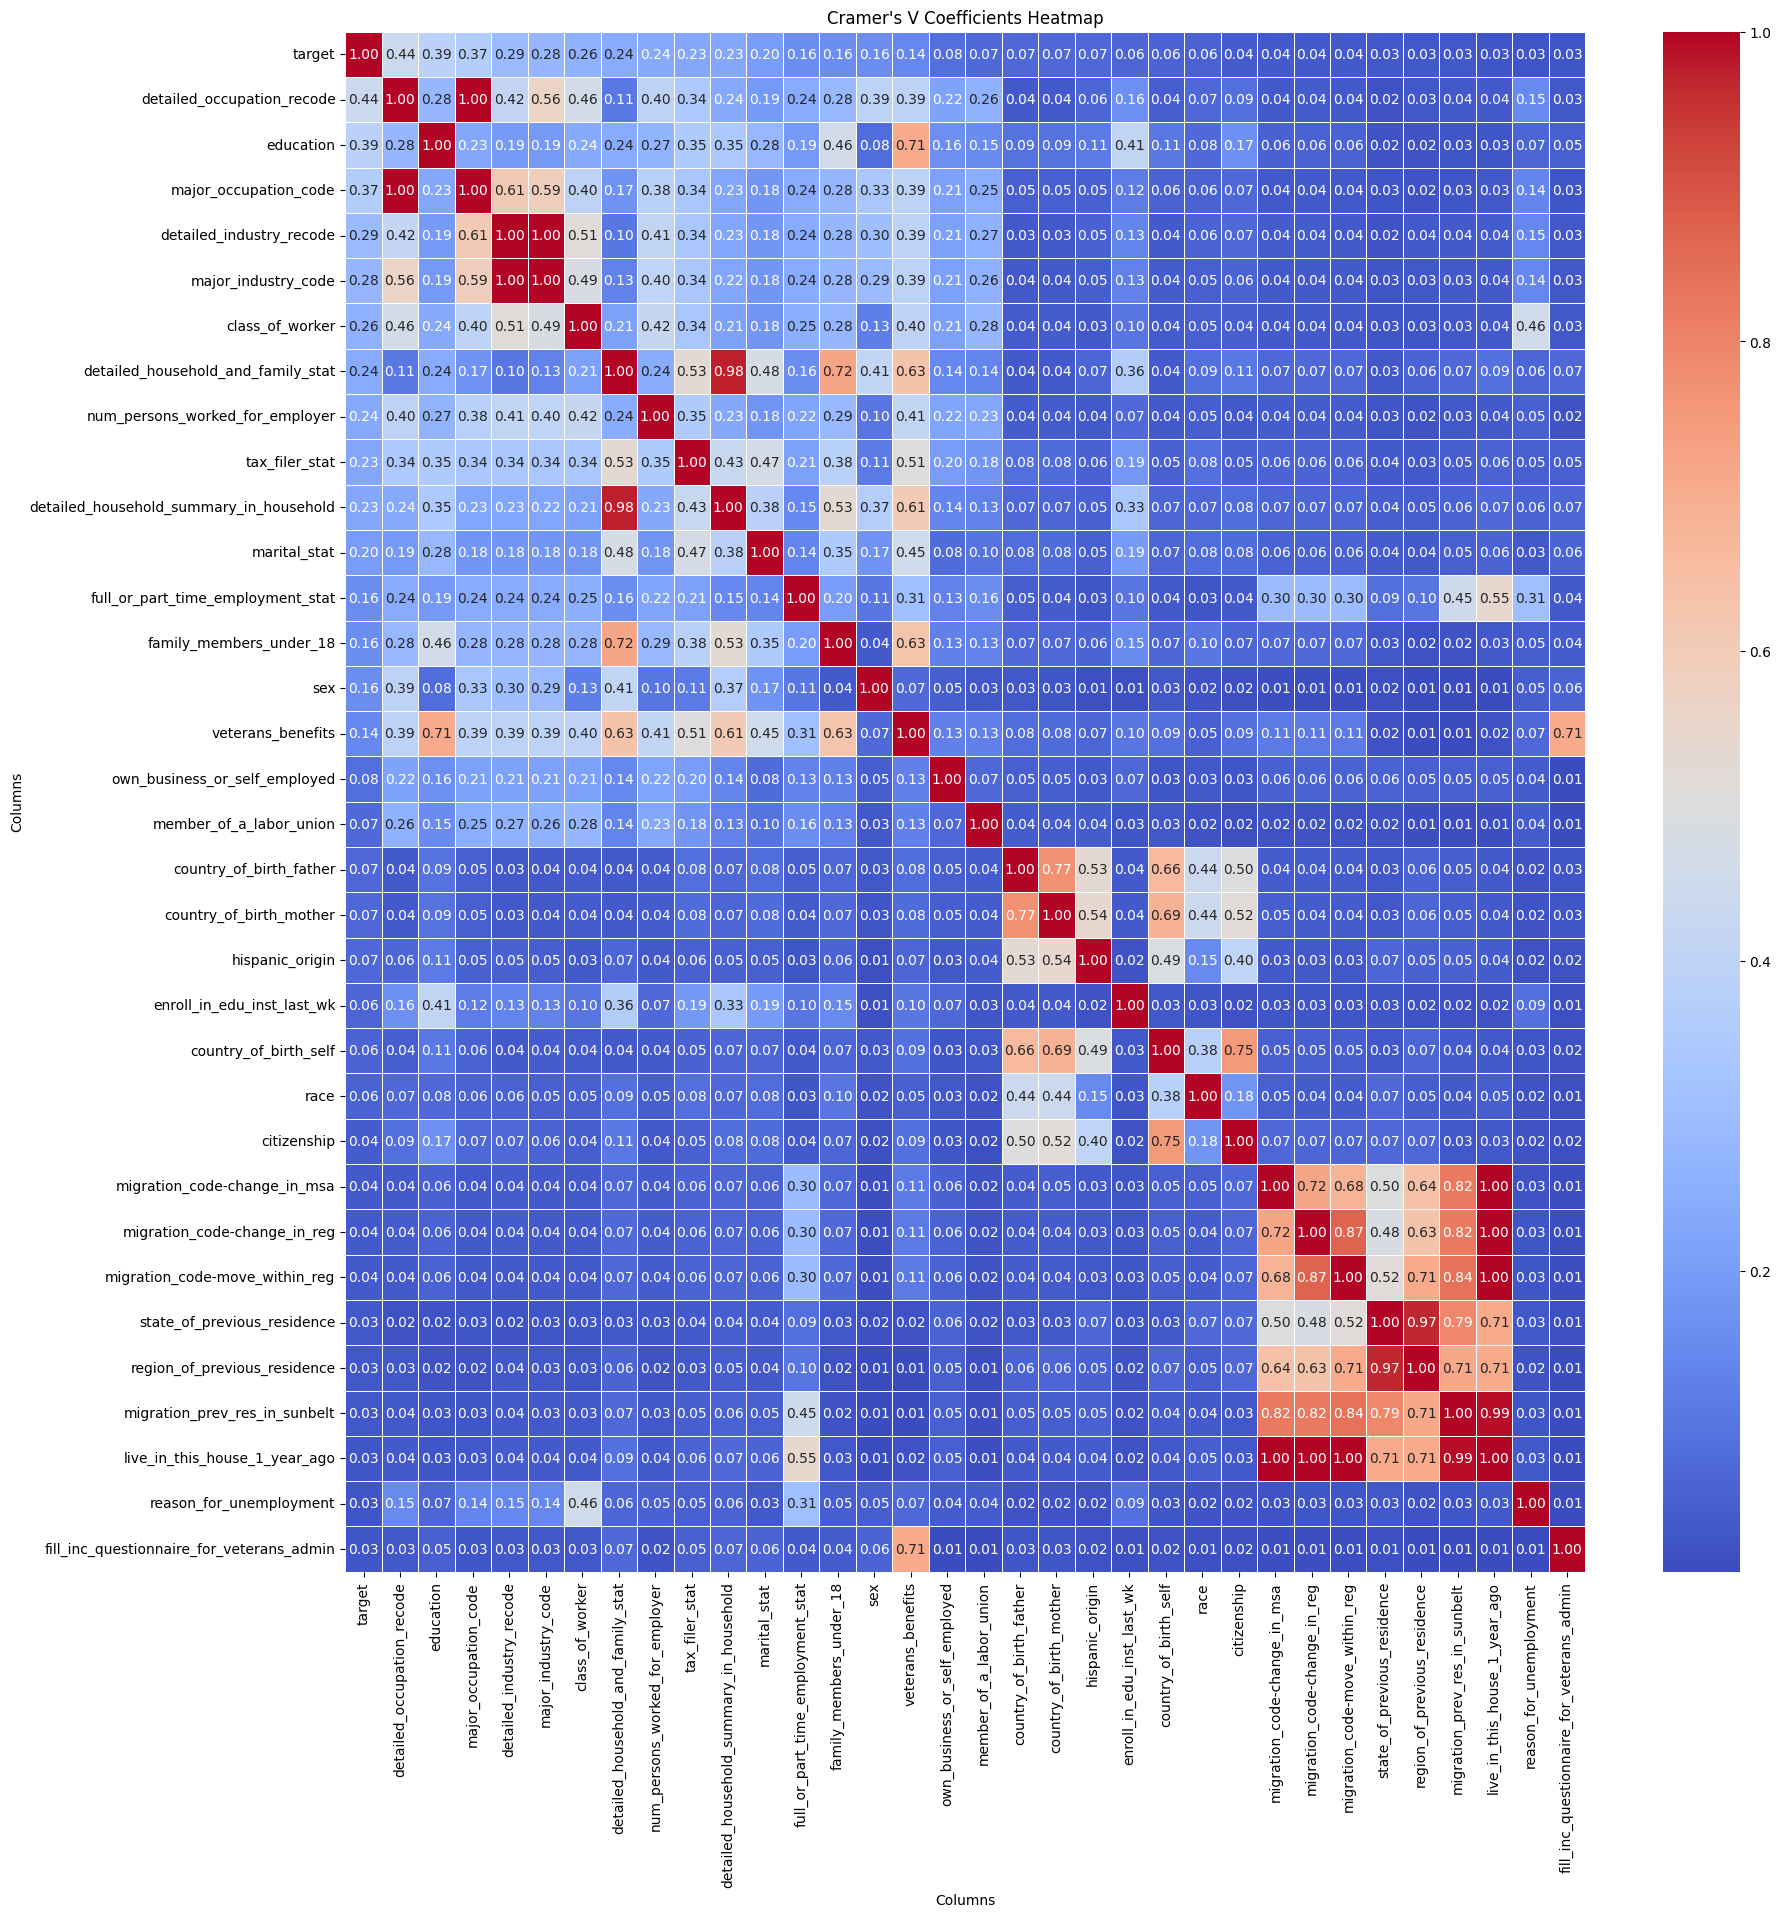

In [16]:
# Order columns and index by descending correlation with the "target" column
target_corr = cramersv_output_table['target'].sort_values(ascending=False).index
corr_matrix = cramersv_output_table.loc[target_corr, target_corr]

# Create a heatmap with Seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)

# Set plot labels and title
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.title("Cramer's V Coefficients Heatmap")

# Show the plot
plt.show()


#### Categorical feature and first variable selection 

In our exploration of feature correlations, we've identified specific features that demonstrate strong correlations with the target variable. These influential features have a substantial impact on our ability to predict salary categories and include:

- detailed_occupation_recode
- education 
- major_occupation_code
- detailed_industry_recode
- major_industry_code
- class of worker
- detailed_household_and_family_stat



Additionally, we've identified two distinct groups of variables within our dataset. The first group encompasses origin-related features, while the second group contains migration-related features. Remarkably, within each group, variables exhibit high correlations with one another. However, notably, neither group displays strong correlations with our target variable.

To streamline our feature selection process, we made decisions about which variables to retain and which to exclude. Below, we provide a breakdown of the variables we chose to remove:

- detailed_industry_recode: This feature exhibits a strong correlation with 'major_industry_code,' which is logical since the latter represents a broader category with fewer details. Therefore, we retain 'major_industry_code.'
- detailed_occupation_recode: Same commentary as above with the 'detailed_occupation_recode' variable
- detailed_household_and_family_stat: Same commentary as above with the detailed_household_summary_in_household




We then discard all variables with a correlation coefficient less than 0.1, except for some:

- race: This variable is retained as it may be essential for public-oriented analysis.

- member_of_labor_union: This feature becomes interesting after conducting univariate graphical analysis.




In [17]:
# List of categorical variables not retained for further analysis
var_categorical_not_retained = [
    'fill_inc_questionnaire_for_veterans_admin',
    'reason_for_unemployment',
    'live_in_this_house_1_year_ago',
    'migration_prev_res_in_sunbelt',
    'region_of_previous_residence',
    'state_of_previous_residence',
    'migration_code-move_within_reg',
    'migration_code-change_in_reg',
    'migration_code-change_in_msa',
    'citizenship',
    'country_of_birth_self',
    'enroll_in_edu_inst_last_wk',
    'hispanic_origin',
    'country_of_birth_mother',
    'country_of_birth_father',
    'detailed_occupation_recode',  
    'detailed_industry_recode',    
    'detailed_household_and_family_stat'  
]

# Drop the specified categorical variables from both the training and test datasets
train_data = train_data.drop(var_categorical_not_retained, axis=1)
test_data = test_data.drop(var_categorical_not_retained, axis=1)

# Update the list of categorical features to exclude those not retained
categorical_features = [var for var in categorical_features if var not in var_categorical_not_retained]


####  Correlation for Numerical Variables - Pearson

In data analysis, Pearson correlation is a widely used method to measure the strength and direction of a linear relationship between two numerical variables. It provides a numerical value between -1 and 1, where:

- 1 indicates a perfect positive linear relationship.
- -1 indicates a perfect negative linear relationship.
- 0 suggests no linear relationship.

**Why use Pearson correlation for numerical variables?**

1. **Linear Relationship:** Pearson correlation is suitable for measuring linear relationships, which often occur in real-world data.

2. **Interpretability:** The -1 to 1 range allows easy interpretation. Values near 1 or -1 indicate strong linear relationships.

3. **Versatility:** It's widely used in various fields.

Text(0.5, 1.0, 'Correlation Heatmap')

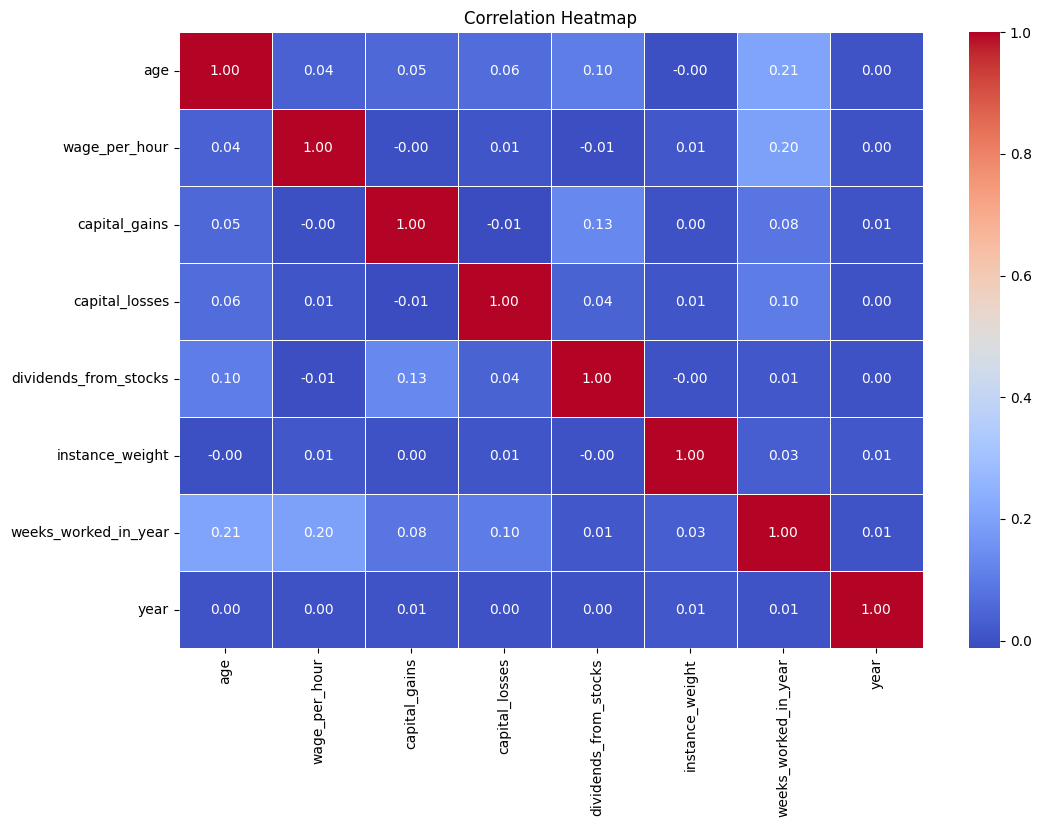

In [18]:
correlations = train_data.loc[:,train_data.dtypes!="category"].corr()

# Plot a heatmap of variable correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

Apparently, there are no clear linear correlations among the numerical variables. Therefore, we can explore the correlations between our numerical variables and the target variable. However, our target variable is dichotomous, so Pearson correlation is not suitable. Instead, we will use the point-biserial correlation method, which is more appropriate in this case

####  Correlation for Numerical Variables - Point-Biserial

The point-biserial correlation method is specifically designed for situations where one variable is numeric, and the other is dichotomous. It provides a reliable measure of the strength and direction of the relationship between the two types of variables, offering insights crucial for analysis and decision-making.


c:\Users\HP\Documents\Projets\2-En cours\Dataiku\rtardif_dataiku_technical_test_project\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\Documents\Projets\2-En cours\Dataiku\rtardif_dataiku_technical_test_project\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\Documents\Projets\2-En cours\Dataiku\rtardif_dataiku_technical_test_project\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


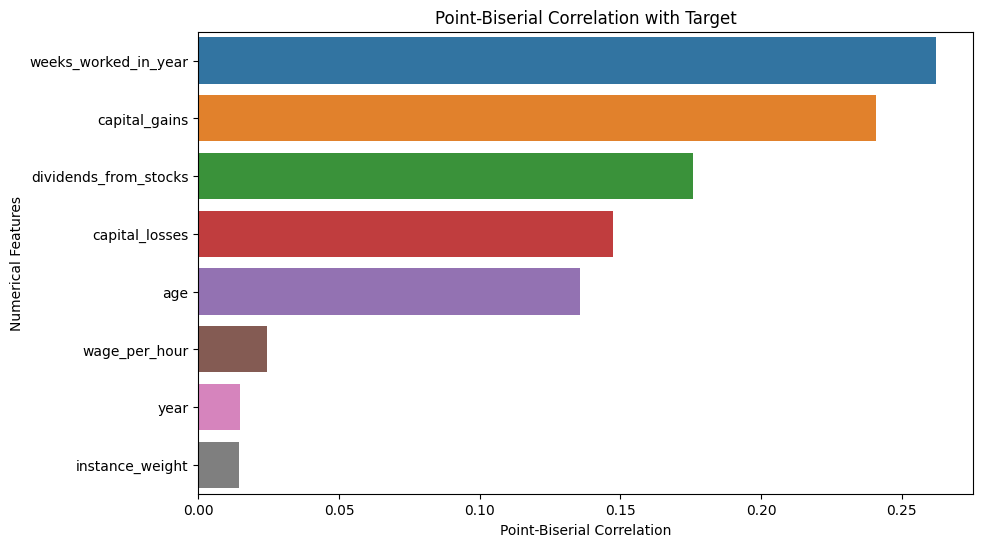

In [19]:
from scipy import stats
df = train_data.loc[:,numerical_features + ['target']]
df['target'] = df['target'].replace({' - 50000.': 0, ' 50000+.':1})

# Initialize empty lists to store correlations and feature names
correlations = []
feature_names = []

# Calculate point-biserial correlation for each numerical feature
for feature in numerical_features:
    point_biserial_corr, _ = stats.pointbiserialr(df[feature], df['target'])
    correlations.append(point_biserial_corr)
    feature_names.append(feature)

# Create a DataFrame to store the results
correlation_df = pd.DataFrame({'Feature': feature_names, 'Point-Biserial Correlation': correlations})

# Sort the DataFrame by correlation magnitude (absolute value)
correlation_df = correlation_df.sort_values(by='Point-Biserial Correlation', ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x='Point-Biserial Correlation', y='Feature', data=correlation_df, orient='h')
plt.title('Point-Biserial Correlation with Target')
plt.xlabel('Point-Biserial Correlation')
plt.ylabel('Numerical Features')
plt.show()



All variables appear to exhibit a positive correlation with our target variable. This suggests that as the numerical values increase, the likelihood of belonging to the high-income category also increases.

It demonstrates strong correlations with 'weeks_worked_in_year', 'capital_gains,' 'dividends_from_stocks,' 'capital_losses,' and age. However, I anticipated a stronger correlation with the 'wage_per_hour' feature. I decided to exclude this variable because it is very similar to the target variable, annual income. Using a variable so closely related to the target as a predictor wouldn't provide much additional information, as it essentially explains the target variable using a nearly identical variable. To ensure that our predictors are meaningful and distinct, I chose not to include wage per hour in our model.

The 'year' variable shows no correlation with our target variable, so we can safely exclude it from our dataset.

The same applies to 'instance_weight,' which was expected since it represents the count of individuals with identical characteristics in a given record. This count arises from a stratified sampling method. It's important to note that we won't use 'instance_weight' in our initial statistical analysis since we'll be working with ratios rather than raw counts. However, we will utilize it in our modeling, but we'll discuss that aspect later.

In [20]:
# List of categorical variables not retained for further analysis
var_numerical_not_retained = ['year', 'wage_per_hour']


# Drop the specified categorical variables from both the training and test datasets
train_data = train_data.drop(var_numerical_not_retained, axis=1)
test_data = test_data.drop(var_numerical_not_retained, axis=1)

# Update the list of categorical features to exclude those not retained
numerical_features = [var for var in numerical_features if var not in var_numerical_not_retained]


### Graphical Analysis

As mentioned earlier, we'll conduct separate graphical analyses for categorical and numerical variables. We'll begin with the graphical analysis of categorical variables and then proceed to the graphical analysis of numerical variables.

#### Graphical Categorical Analysis
I've created a function that takes the name of a categorical column as a parameter and returns its distribution as well as its distribution based on income. We will visually analyze the most interesting features.


In [21]:
import warnings
warnings.filterwarnings('ignore')

def plot_categorical_analysis(col):
    
    # Count plot on a single categorical variable
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=col, data=train_data, stat="percent", shrink=0.8)
    plt.title(f"Distribution of {col} Categories")  
    plt.xticks(rotation='vertical')
    plt.legend().set_visible(False)  # Remove the legend

    plt.subplot(1, 2, 2)
    
    # Calculate percentage based on instance weights
    total = train_data.groupby(col)['instance_weight'].sum().reset_index()
    poor = train_data[train_data.target == ' - 50000.'].groupby(col)['instance_weight'].sum().reset_index()
    poor['instance_weight'] = [i / j * 100 for i, j in zip(poor['instance_weight'], total['instance_weight'])]
    total['instance_weight'] = [i / j * 100 for i, j in zip(total['instance_weight'], total['instance_weight'])]

    # Bar chart 1 -> top bars
    bar1 = sns.barplot(x=col, y="instance_weight", data=total, color='lightblue', label="Proportion of 'High Income'")

    # Bar chart 2 -> bottom bars
    bar2 = sns.barplot(x=col, y="instance_weight", data=poor, color='darkblue', label="Proportion 'Low Income'")
    plt.title(f"Income Distribution by Category for {col}")  
    plt.ylabel("Percent")  
    
    plt.xticks(rotation='vertical')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
    
    plt.show()


**Class of worker**

- State government, local government, and private employment sectors have a relatively reasonable distribution of high and low-income individuals.
- Categories like "not in universe," "never worked," and "without pay" predominantly consist of individuals with low income, which is logically expected.
- The federal government employment sector shows slightly higher income levels compared to the local and state government sectors.
- Self-employed individuals with incorporated businesses tend to have higher incomes.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


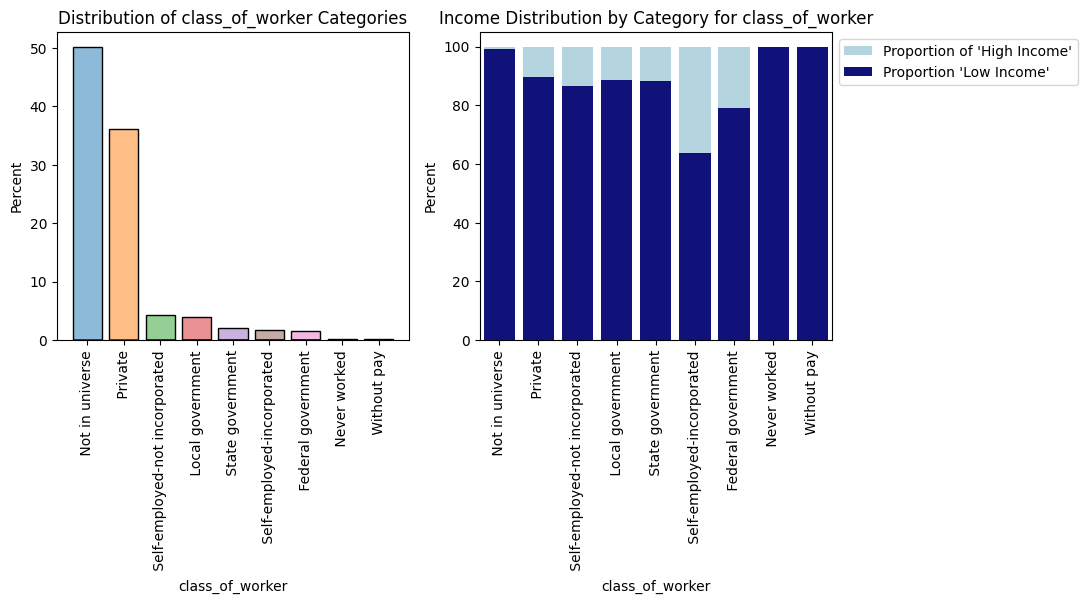

In [22]:
plot_categorical_analysis('class_of_worker')

   **Major industry code**

   - The variable contains various categories, with "Not in universe or children" being the most common category, accounting for approximately 99.06% of the samples.
   - The sectors with the highest representation include Retail Trade, Manufacturing of durable goods, and Education.
   - Categories such as "Mining" (69.73%), "Communications" (77.09%), and "Other professional services" (76.41%) have relatively lower percentages of low-income individuals.
   - Categories like "Private household services" (99.45%), "Personal services except private HH" (96.29%), and "Social services" (96.69%) have higher percentages of low-income individuals.
   - "Private household services" has the highest percentage of low-income individuals (99.45%), indicating a significant proportion of individuals in this category have low income.
   - There is considerable variability in the percentage of low-income individuals across different categories, ranging from as low as 69.73% to as high as 99.45%.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


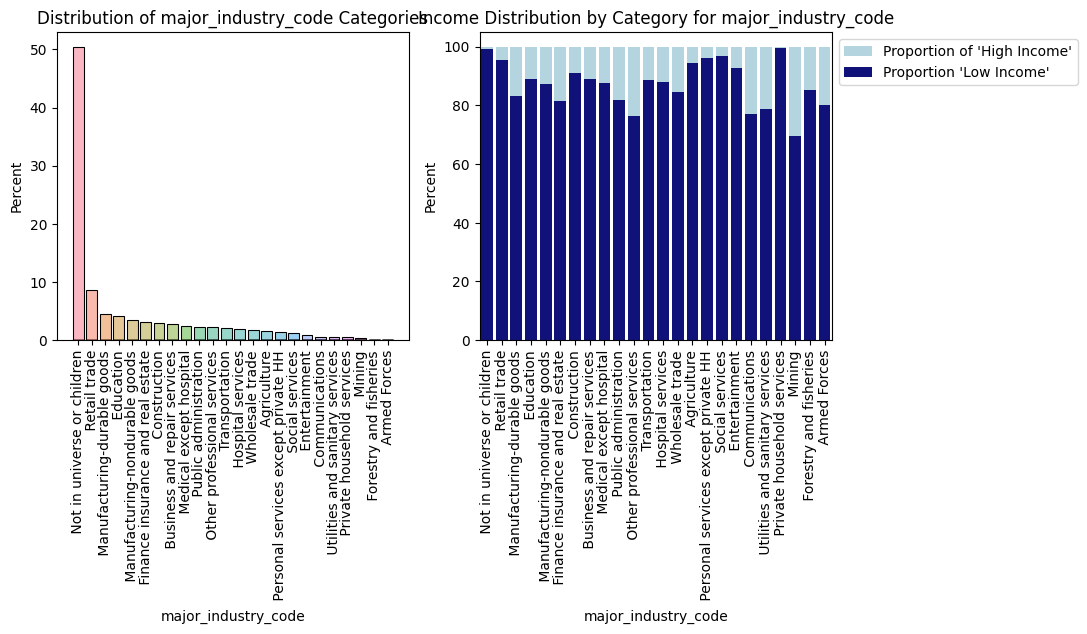

In [23]:
plot_categorical_analysis('major_industry_code')

**Detailed_household_summary_in_household**

   - The most common household relationship category is "Householder," wich represent more than 35 % of the individuals.
   - The second most prevalent category is "Child under 18 never married," with around 25% of the individuals.
   - Householders have the highest proportion of high-income individuals, followed by spouses of householders. Non-relatives have slightly lower incomes, while children and other relatives of householders have the lowest incomes.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


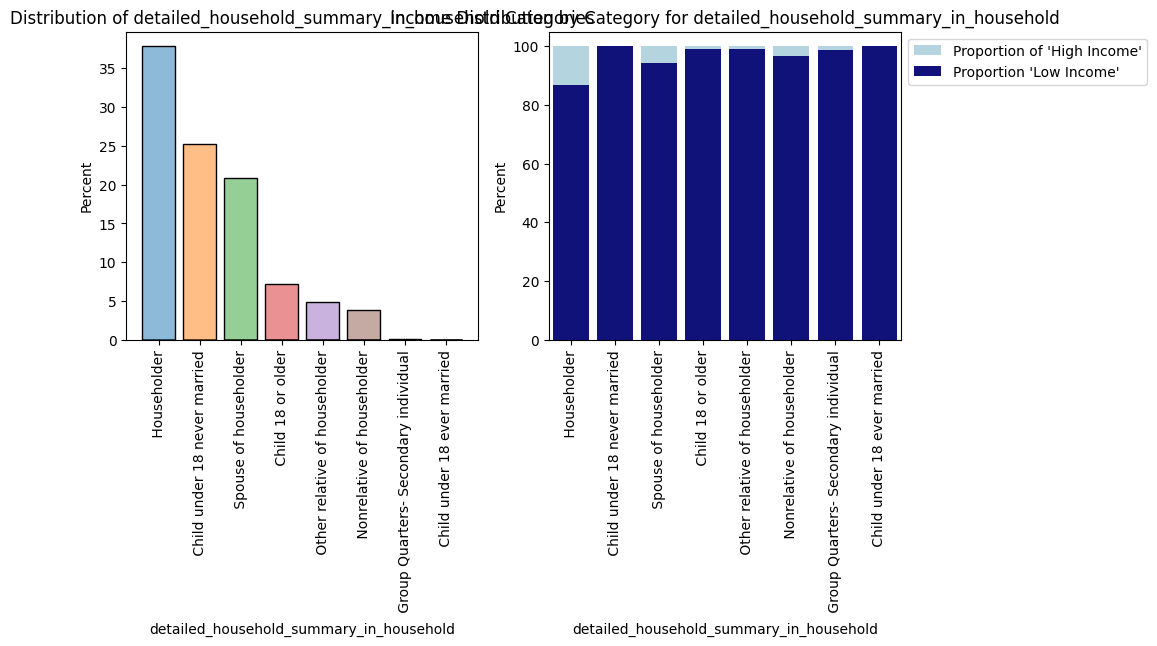

In [24]:
plot_categorical_analysis('detailed_household_summary_in_household')

**Race**

   - The largest groups are "White" and "Black," followed by "Asian or Pacific Islander," "Other," and "Amer Indian Aleut or Eskimo."
   - The "Black" category exhibits the highest percentage of individuals classified as "Low Income" (approximately 97.51%).
   - Other categories, including "Other" (97.30%) and "Amer Indian Aleut or Eskimo" (96.45%), also have a significant presence of low-income individuals.
   - Even in the "White" category, the largest group, a substantial portion of individuals falls into the "Low Income" category (approximately 92.96%).  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


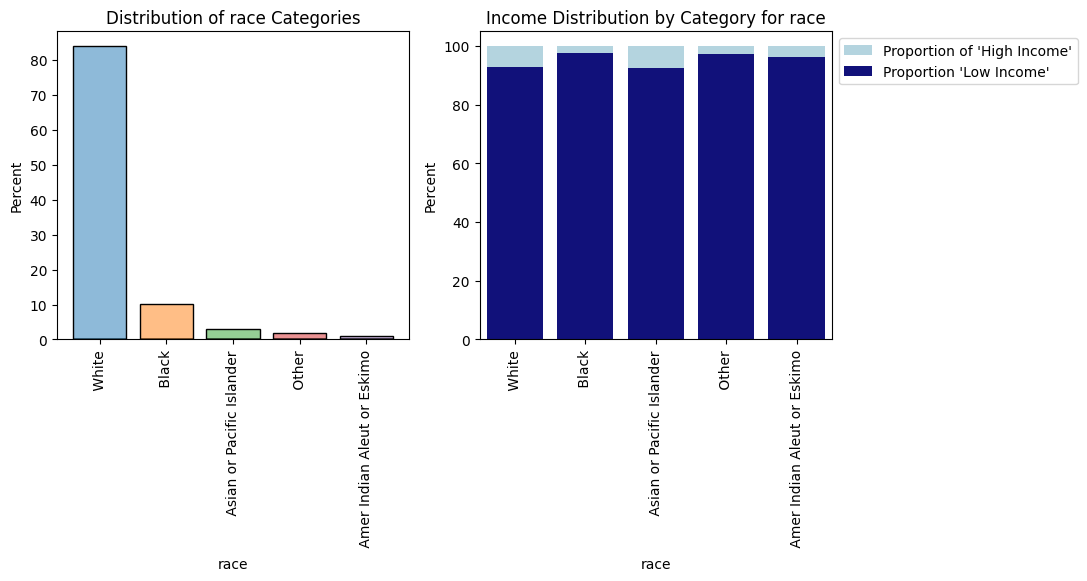

In [25]:
plot_categorical_analysis('race')

**Sex**

   - The analysis reveals notable income disparities between the two gender categories.
   - Among women, a significant percentage (approximately 97.33%) fall into the "Low Income" category, indicating that a higher proportion of women in the dataset have lower incomes.
   - In contrast, among men, a lower percentage (approximately 89.68%) are classified as "Low Income," suggesting that a relatively smaller proportion of men have lower incomes.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


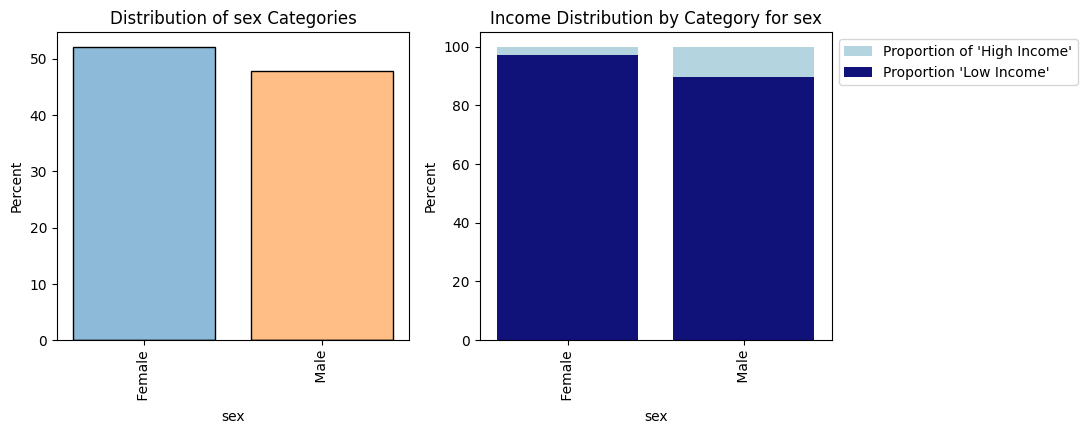

In [26]:
plot_categorical_analysis('sex')

#### Graphical Numerical analysis

In [27]:
def plot_boxplot(col):
    sns.boxplot(data=train_data, x='target', y=col)
    plt.xticks(rotation='vertical')
    plt.xlabel('Income Category')
    plt.ylabel(col)
    plt.title(f'Boxplot of {col} by Income Category')
    plt.show()


**Age**

 - The role of age in income levels appears significant, with a clear trend indicating that older individuals tend to have higher incomes. 
 - This suggests that as individuals advance in age, their earning potential may increase, possibly due to accumulated experience, seniority in the workforce, or other factors that positively influence income.

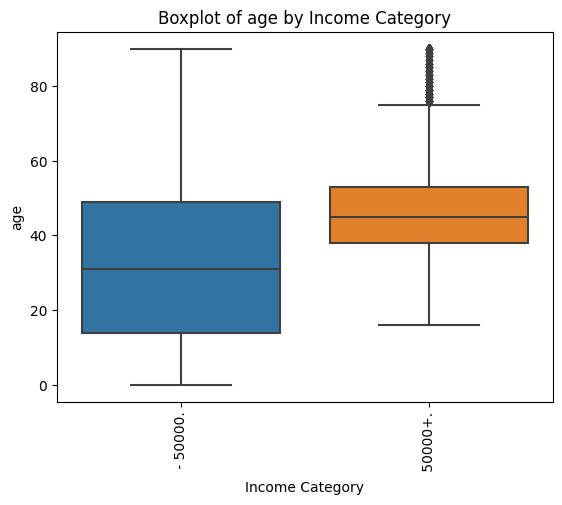

In [28]:
plot_boxplot('age')


**Weeks_worked_in_year**

- It's worth noting that nearly all individuals classified as high-income work consistently throughout the year, completing 52 weeks of work. 
- In contrast, the low-income category exhibits a wider range of weeks worked, varying from 0 weeks to 52 weeks. 
- This pattern results in a strong correlation between the 'weeks_worked_in_year' variable and the target variable. 
- Essentially, this correlation highlights the importance of employment stability as a key factor in determining income levels, as individuals who work consistently throughout the year tend to have higher incomes.

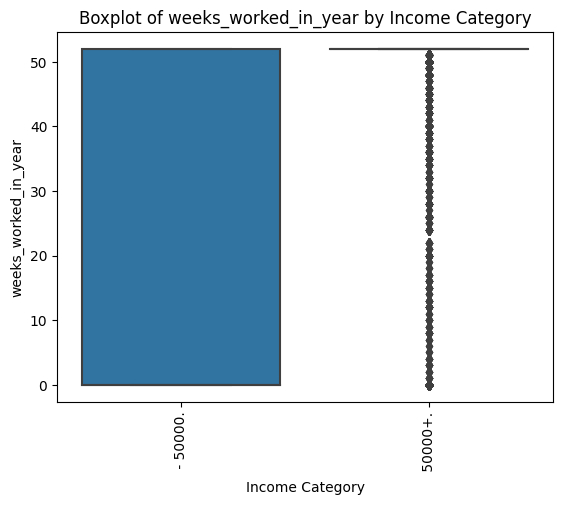

In [29]:
plot_boxplot('weeks_worked_in_year')


The capital gains and all other investment-related variables exhibit significant skewness due to the fact that only a small proportion of individuals in both income categories are affected by these variables. Consequently, we plan to address this skewness by categorizing this variable later on to distill its essential insights. Additionally, we intend to aggregate all investment-related variables to streamline our feature set and enhance model interpretability.

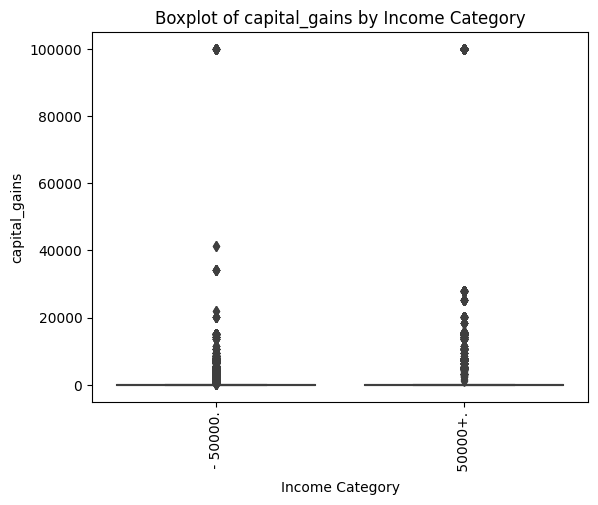

In [30]:
plot_boxplot('capital_gains')


## Feature engineering

I'd like to clarify our approach regarding 'Not In Universe.' We do not treat it as a null value, as it could contain valuable information that is specific to the category itself.

### Re-categorization of Columns

As you can observe, the 'Education' variable contains numerous categories. The primary concern is that infrequently occurring categories can potentially affect the model's quality. Furthermore, upon closer examination, we note that there appear to be minimal differences between the 1st grade and the 12th grade categories, suggesting that they could be combined. Below, you will find the re-categorization of certain variables in our dataset. The columns selected for re-categorization were determined through a graphical analysis.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


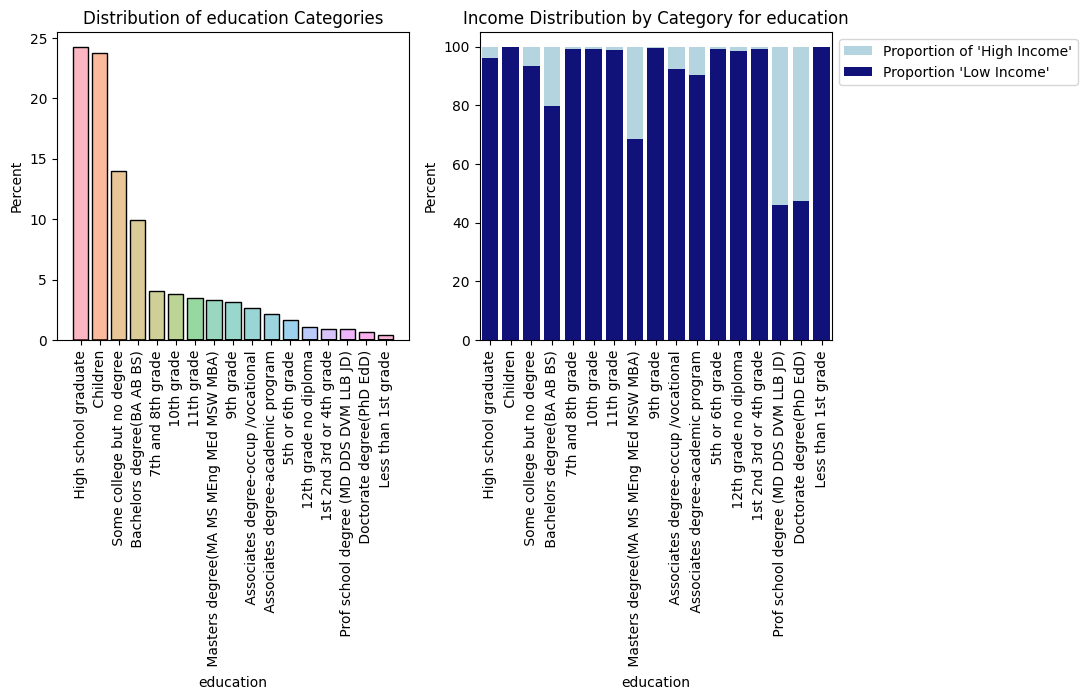

In [31]:
plot_categorical_analysis('education')

In [32]:
def recategorize_datasets(input_dataset):

    input_dataset['education'] = input_dataset['education'].replace({
        ' Some college but no degree': '1st - 12th grade', 
        ' 7th and 8th grade': '1st - 12th grade',
        ' 10th grade': '1st - 12th grade',
        ' 11th grade': '1st - 12th grade',
        ' 9th grade': '1st - 12th grade',
        ' 5th or 6th grade': '1st - 12th grade',
        ' 12th grade no diploma': '1st - 12th grade',
        ' 1st 2nd 3rd or 4th grade': '1st - 12th grade',
        ' Less than 1st grade':'1st - 12th grade',


        ' Masters degree(MA MS MEng MEd MSW MBA)': 'superior_education',
        ' Prof school degree (MD DDS DVM LLB JD)': 'superior_education',
        ' Doctorate degree(PhD EdD)':'superior_education',

        ' Associates degree-occup /vocational': 'Associates_degree_ocup_accademic',
        ' Associates degree-academic program': 'Associates_degree_ocup_accademic'
        })

    input_dataset['marital_stat'] = input_dataset['marital_stat'].replace({
        ' Married-civilian spouse present': 'Married',
        ' Married-civilian spouse present': 'Married',
        ' Married-A F spouse present': 'Married'
        })

    input_dataset['race'] = input_dataset['race'].replace({
        ' Amer Indian Aleut or Eskimo': ' Other'
        })


    input_dataset['full_or_part_time_employment_stat'] = input_dataset['full_or_part_time_employment_stat'].replace({
        ' Full-time schedules': 'Employed',
        ' PT for non-econ reasons usually FT': 'Employed',
        ' PT for econ reasons usually PT': 'Employed',
        ' PT for econ reasons usually FT': 'Employed',
        ' Unemployed full-time': 'Unemployed',
        ' Unemployed part- time': 'Unemployed'
        })

    input_dataset['tax_filer_stat'] = input_dataset['tax_filer_stat'].replace({
        ' Joint one under 65 & one 65+': 'Joint_1of_them_is_plus_65',
        ' Joint both 65+': 'Joint_1of_them_is_plus_65'
        })


    input_dataset['detailed_household_summary_in_household'] = \
        input_dataset['detailed_household_summary_in_household'].replace({
        ' Child under 18 never married': 'Child_under_18',
        ' Child under 18 ever married': 'Child_under_18',
        ' Group Quarters- Secondary individual': ' Child 18 or older'
        })
    
    input_dataset['num_persons_worked_for_employer'] = \
        input_dataset['num_persons_worked_for_employer'].replace({
        '0': 'NIU',
        '1': 'under_1000',#'under_10',
        '2': 'under_1000',#'10_24',
        '3': 'under_1000',#'25-99'
        '4': 'under_1000',#'100-499'
        '5': 'under_1000',#'500-999'
        '6': '1000+'
        })
    
    return input_dataset





In [33]:
train_data = recategorize_datasets(train_data)
test_data = recategorize_datasets(test_data)

See now the **education** variable :

It is pretty clear now that individuals with higher levels of education tend to have higher incomes, with a slightly lower representation among those with bachelor's degrees. Conversely, individuals in the lower income bracket are more commonly found among high school graduates and those with education levels ranging from 1st to 12th grade.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


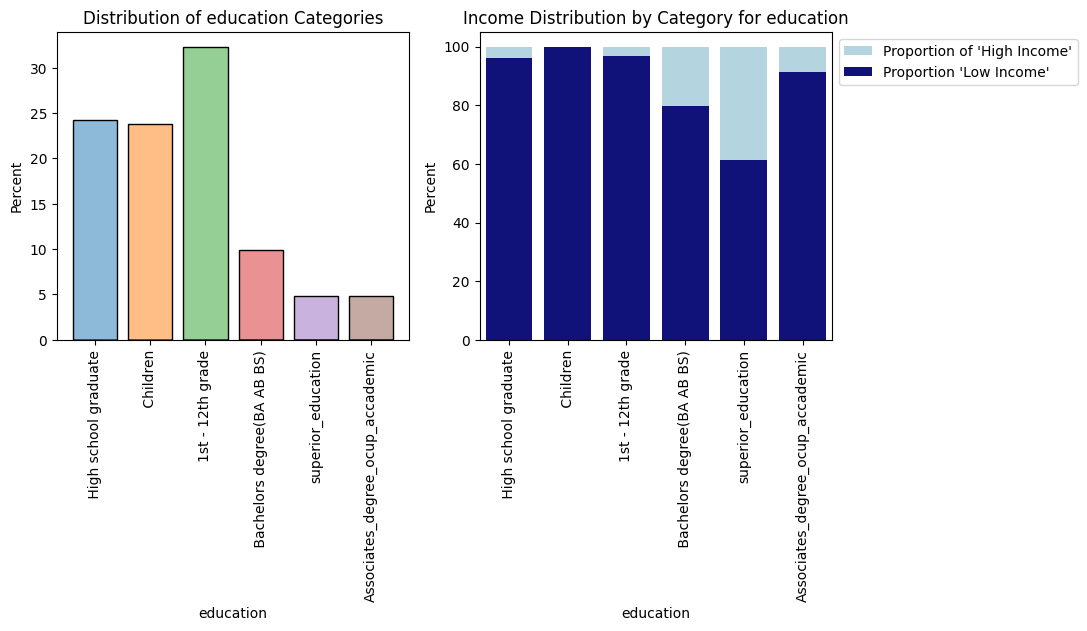

In [34]:
plot_categorical_analysis('education')

Categorizing **Age**

I have categorized the "age" variable into distinct and intuitive age groups. It becomes evident that individuals within the 0-25 age range tend to have lower incomes, while those in the 26-65 age group generally enjoy higher incomes. Beyond the age of 65, income levels tend to decline.

In [35]:
# Apply cut() to categorize the age column in both train_data and test_data
bins = [0, 18, 25, 35, 45, 65, 80, 150]
labels = ['0-18', '19-25', '26-35', '36-45', '46-65', '66-80', '80+']

train_data['age'] = pd.cut(train_data['age'], bins=bins, labels=labels)
test_data['age'] = pd.cut(test_data['age'], bins=bins, labels=labels)

# Update numerical_features and categorical_features lists
numerical_features.remove('age')
categorical_features.append('age')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


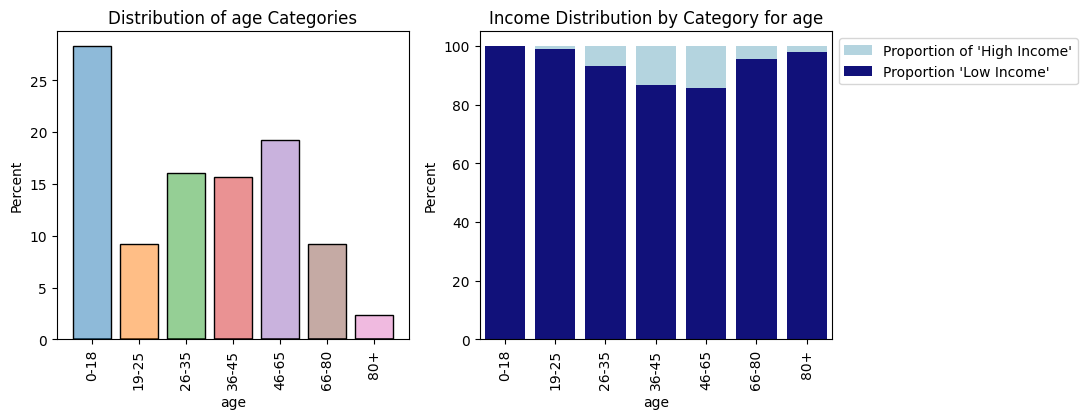

In [36]:
plot_categorical_analysis('age')

Categorizing **'weeks_worked_in_year'**

In [37]:
# Apply cut() to categorize the weeks_worked_in_year column in both train_data and test_data
bins = [-1, 0.5, 21, 51.5, 53]
labels = ['Unemployed', '-6months', '+6months', 'FT']

train_data['weeks_worked_in_year'] = pd.cut(train_data['weeks_worked_in_year'], bins=bins, labels=labels)
test_data['weeks_worked_in_year'] = pd.cut(test_data['weeks_worked_in_year'], bins=bins, labels=labels)

# Update numerical_features and categorical_features lists
numerical_features.remove('weeks_worked_in_year')
categorical_features.append('weeks_worked_in_year')


Categorizing and aggregating of the investement features (**capital_gains**, **capital_loss**, **dividends_from_stock**)

In [38]:
columns_to_drop = ['capital_gains', 'dividends_from_stocks', 'capital_losses']

train_data.insert(1, 'investment_feature', train_data['capital_gains'] + train_data['dividends_from_stocks'] - train_data['capital_losses'])
test_data.insert (1,'investment_feature', test_data['capital_gains'] + test_data['dividends_from_stocks'] - test_data['capital_losses'])

# Apply cut() to categorize the investment_feature column in both train_data and test_data
bins = [-99999999, -0.1, 0.1, 2000, 10000, 9999999999]
labels = ['financial_lost', 'no_financial', '-2000', '2000:10000', '+10000']

train_data['investment_feature'] = pd.cut(train_data['investment_feature'], bins=bins, labels=labels)
test_data['investment_feature'] = pd.cut(test_data['investment_feature'], bins=bins, labels=labels)

train_data.drop(columns_to_drop, axis=1, inplace=True)
test_data.drop(columns_to_drop, axis=1, inplace=True)

categorical_features.append('investment_feature')
numerical_features = [x for x in numerical_features if x not in columns_to_drop]

Reviewing all the variables chosen for our model ...

In [39]:
# Create a dictionary to store feature names and their types
feature_dict = {'feature_name': categorical_features + numerical_features,
                'feature_type': ['Categorical'] * len(categorical_features) + ['Numerical'] * len(numerical_features)}

# Create a DataFrame from the dictionary
feature_df = pd.DataFrame(feature_dict)


feature_df

,feature_name,feature_type
0,class_of_worker,Categorical
1,education,Categorical
2,marital_stat,Categorical
3,major_industry_code,Categorical
4,major_occupation_code,Categorical
5,race,Categorical
6,sex,Categorical
7,member_of_a_labor_union,Categorical
8,full_or_part_time_employment_stat,Categorical
9,tax_filer_stat,Categorical


In [40]:
train_data = train_data.drop('instance_weight', axis=1)
test_data = test_data.drop('instance_weight', axis=1)

## Building the Classification Model 

We are currently left with 18 categorical variables and 1 numerical variable. The "instance_weight" variable is not considered as a feature and is primarily useful for potential resampling operations. As of now, we are exclusively dealing with categorical features. However, I'll provide comments on the preprocessing steps we would undertake if we had numerical variables.

The initial model I intend to test is penalized logistic regression. This choice was made because it offers high explainability and is one of the simplest algorithms to train. It will provide us with quick results that we can analyze to address our problematic.

#### Import libraries

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve

#### Training

Let's create our training and testing matrices and store them in different variables, Y and X. For the target variable, we apply a LabelBinarizer to transform it into binary values, where 1 represents one class, and 0 represents the other.

In [42]:
# Define X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test = train_data.iloc[:, :-1], LabelBinarizer().fit_transform(train_data.iloc[:, -1]), \
    test_data.iloc[:, :-1], LabelBinarizer().fit_transform(test_data.iloc[:, -1])

In [43]:
# Separate categorical and numerical features
categorical_features = [col_name for col_name in X_train.columns if X_train[col_name].dtype == 'category']
numerical_features = [col_name for col_name in X_train.columns if col_name not in categorical_features]

In this phase, we develop a transformer to preprocess our variables before they enter our model. We segregate our numerical and categorical variables for tailored treatments.

For our categorical variables, we implement a one-hot encoding step. This transformation turns each category within a variable into a separate binary variable (dummy variable). Consequently, the number of binary variables created is equal to the number of unique categories within the original variable, potentially increasing the number of features substantially.

However, we are aware that this process can lead to correlations among the newly created one-hot encoded variables. For example, 'not in universe' in the 'class of worker' variable might be correlated with certain features generated from the 'full_or_part_time_employment_stat' variable.

Initially, we run our model without implementing a feature selection step, which means that the L2 regularization couldn't fully express itself. In light of this, we found it valuable to introduce a feature selector. This selector's primary purpose is to eliminate unnecessary variables that are correlated with each other, achieving a better balance between L1 and L2 penalties in our final model.


In [44]:
# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('lasso_selector', SelectFromModel(LogisticRegression(penalty='l1', solver='saga')))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        #('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

The code below sets up a machine learning pipeline to create a Logistic Regression model with an elastic net penalty.
   - Configures a Logistic Regression model with specific settings:
     - Uses the elastic net penalty, combining L1 and L2 regularization techniques.
     - Utilizes the 'saga' solver, suitable for large datasets and elastic net regularization.
     - Addresses class imbalance using balanced class weights.

   - Creates a processing pipeline that sequences data preprocessing and modeling steps:
     - The first step, named 'preprocessor,' applies data transformations such as feature scaling and one-hot encoding for categorical variables.
     - The second step, named 'classifier,' incorporates the configured Logistic Regression model.

In [45]:
# Create the ElasticNet Logistic Regression model
model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, class_weight='balanced')

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

In the following code, we are defining a range of parameters that GridSearchCV will utilize to search for the optimal parameter combination, aiming to maximize the F1 score. The F1 score serves as a valuable metric for assessing models in situations where there's a significant imbalance between the classes

Initially, we explored a set of parameters, as listed below:

- 'classifier__C': [0.001, 0.01, 0.1, 1, 10],
- 'classifier__l1_ratio': [0.1, 0.5, 0.8],
- 'preprocessor__cat__lasso_selector__estimator__C': [0.001, 0.01, 0.1, 1]

The best parameters appear to be : Best Parameters: {'classifier__C': 0.5, 'classifier__l1_ratio': 0.5, 'preprocessor__cat__lasso_selector__estimator__C': 0.05}

In [46]:
# Define the parameter grid for grid search
param_grid = {
    'classifier__C': [0.5, 0.1],
    'classifier__l1_ratio': [0.1, 0.5, 0.8],
    'preprocessor__cat__lasso_selector__estimator__C': [0.05]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='f1', verbose=3, error_score='raise')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4] END classifier__C=0.5, classifier__l1_ratio=0.1, preprocessor__cat__lasso_selector__estimator__C=0.05;, score=0.428 total time=  20.3s
[CV 2/4] END classifier__C=0.5, classifier__l1_ratio=0.1, preprocessor__cat__lasso_selector__estimator__C=0.05;, score=0.432 total time= 2.5min
[CV 3/4] END classifier__C=0.5, classifier__l1_ratio=0.1, preprocessor__cat__lasso_selector__estimator__C=0.05;, score=0.424 total time=  21.3s
[CV 4/4] END classifier__C=0.5, classifier__l1_ratio=0.1, preprocessor__cat__lasso_selector__estimator__C=0.05;, score=0.429 total time=  22.7s
[CV 1/4] END classifier__C=0.5, classifier__l1_ratio=0.5, preprocessor__cat__lasso_selector__estimator__C=0.05;, score=0.428 total time=  35.6s
[CV 2/4] END classifier__C=0.5, classifier__l1_ratio=0.5, preprocessor__cat__lasso_selector__estimator__C=0.05;, score=0.432 total time=  31.4s
[CV 3/4] END classifier__C=0.5, classifier__l1_ratio=0.5, preprocessor__cat_

#### Evaluate

We then plot a precision recall curve to try to find the best threshold.

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

Best Threshold: 0.9214418649997793


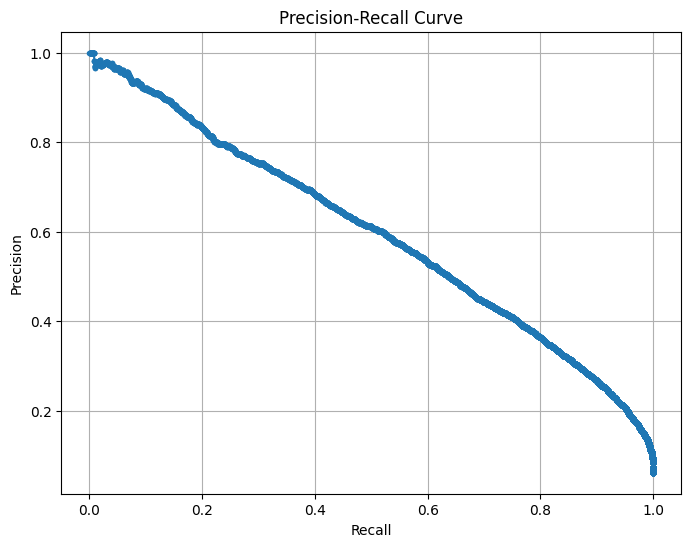

In [47]:
# Make predictions using the best model
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Find the threshold that maximizes the F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
print("Best Threshold:", best_threshold)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

Then we show our classification report and the confusion matrix below :

In [48]:
# Apply the best threshold to make binary predictions
y_pred_binary = (y_prob >= best_threshold).astype(int)

# Create a classification report based on the best threshold
classification_rep= classification_report(y_test, y_pred_binary)

# Compute and display the confusion matrix based on the best threshold
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Print the results
print("Classification Report (Custom):\n", classification_rep)
print("Confusion Matrix :\n", conf_matrix)

Classification Report (Custom):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     93575
           1       0.54      0.59      0.57      6186

    accuracy                           0.94     99761
   macro avg       0.76      0.78      0.77     99761
weighted avg       0.95      0.94      0.94     99761

Confusion Matrix :
 [[90474  3101]
 [ 2520  3666]]


Based on these results, the following observations can be made:

- The model performs well in terms of precision and recall for class 0 (<= 50,000$ income), with high values for both metrics.
- However, the model's performance is less balanced for class 1 (> 50,000$ income). While precision is moderate, recall is relatively low, indicating that the model tends to miss a significant portion of individuals with high income.
- The F1-score for class 1 reflects this trade-off between precision and recall, resulting in a lower F1-score.
- The model's overall accuracy is high, but it's important to consider the class imbalance. The high accuracy is primarily driven by the correct predictions for class 0, which is the majority class.

Then we extract the model coefficients and plot it to be able to analyse the results

In [49]:
# Extract coefficients and feature names
coefficients = best_model.named_steps['classifier'].coef_[0]
feature_names = list(best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
selected_variables_by_lasso = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['lasso_selector'].get_support()
feature_names = [feature_names[i] for i in range(len(feature_names)) if selected_variables_by_lasso[i]]
#feature_names =np.array(numerical_features + feature_names)

# Create a DataFrame to display coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})


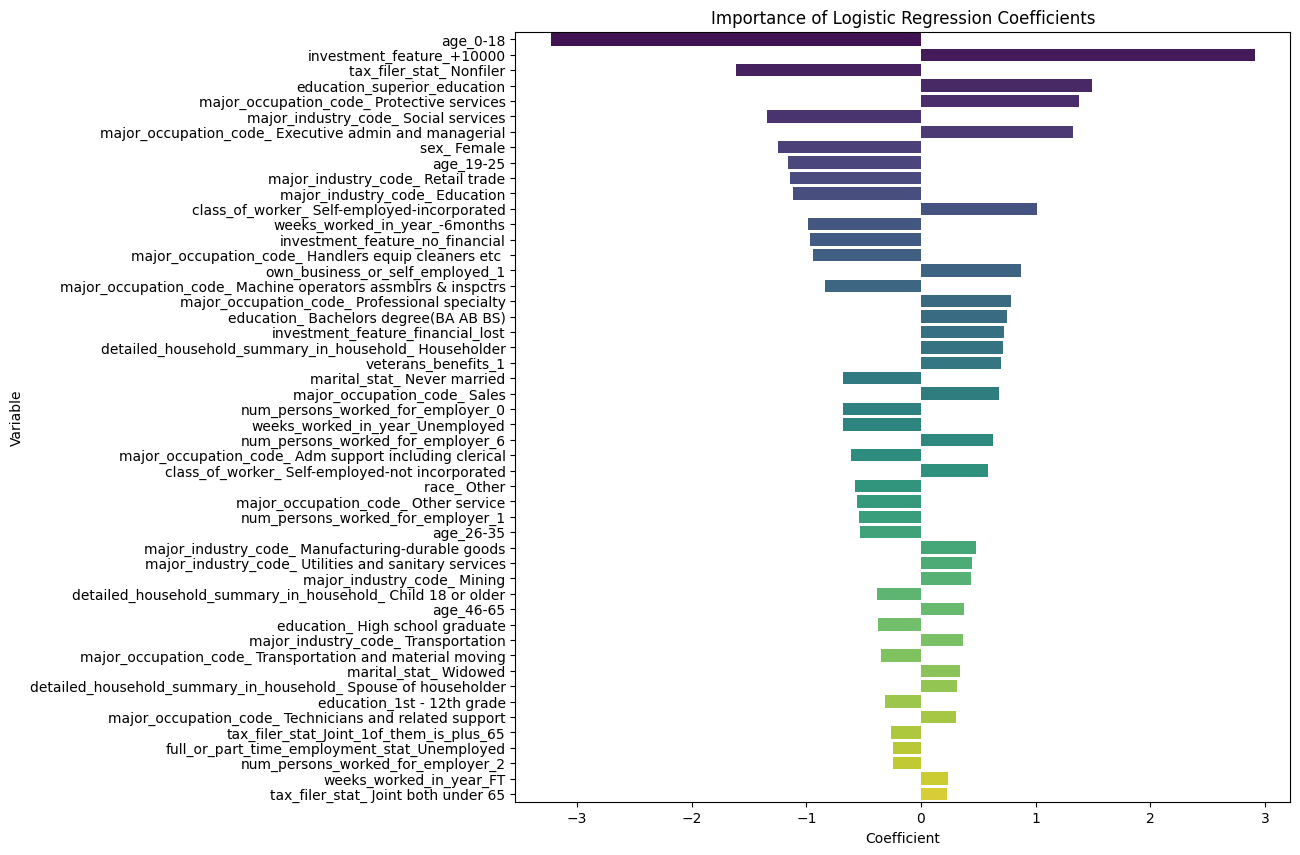

In [50]:
# Sort the DataFrame by the absolute value of the coefficient to highlight the most important ones
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

coefficients_df_best = coefficients_df.iloc[:50,:]
# Create a bar chart to display the coefficients
plt.figure(figsize=(10, 10))


sns.barplot(x='Coefficient', y='Feature', data=coefficients_df_best, palette='viridis')
plt.title('Importance of Logistic Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.show()

## Results

### Model results

As mentioned earlier, we employ class_weight='balanced' to address the issue of class imbalance in our dataset. In simple terms, it adjusts the loss function of the logistic regression in a way that assigns weights inversely proportional to each class. This means that it penalizes misclassifications of the minority class more significantly.

It's a straightforward approach to handling imbalanced datasets and can be effective in many cases. However, when dealing with extremely imbalanced datasets, it might be advisable to explore alternative models, such as ensemble methods like Random Forest or boosting techniques, which offer more advanced mechanisms for handling class imbalances.

Overall, the results appear to be satisfactory. From a business perspective, the model seems to provide consistent and insightful results. Beyond performance, our goal was to address a business question, and our model seems to aswer it well. 
Due to the fact that our data is unbalanced, the model, despite using 'class_weight' = 'balanced,' struggles to predict our minority class.


We trained a quick & dirty XGBoost model at the end of this document to compare our model's pure performance. It seems that XGBoost slightly outperforms our logisticRegression. With more fine tuning, we can aim to achieve an improved model, which would serve as a valuable foundation for future improvements.

### Business results & recommandations

Several variables appear to have a significant impact on income levels. Below are the most influential variables and associated recommendations:

1. **Women**:
   - **Recommendation**: Promote gender equality in the workforce and ensure fair wages for women.
   - **Public Endeavors**: Implement policies that close the gender pay gap, support work-life balance, and encourage women's participation in higher-paying industries and leadership roles.

2. **Age Category 19-25**:
   - **Recommendation**: Invest in education and job opportunities for young adults.
   - **Public Endeavors**: Create apprenticeship programs, provide affordable access to higher education, and offer job placement services for this age group.

3. **Industry - Social Services**:
   - **Recommendation**: Enhance career prospects and wages within the social services sector.
   - **Public Endeavors**: Increase funding for social services, provide professional development opportunities, and advocate for fair wages and benefits for workers in this field.

4. **Unemployed or Part-Time Workers**:
   - **Recommendation**: Promote full-time employment and job stability.
   - **Public Endeavors**: Implement policies that incentivize businesses to offer full-time positions with benefits, provide unemployment assistance, and create job training programs for unemployed or part-time workers.

5. **Industry - Education**:
   - **Recommendation**: Strengthen the education sector and enhance job opportunities within it.
   - **Public Endeavors**: Invest in education infrastructure, offer competitive salaries and benefits for educators, and provide resources for students in underserved communities.

6. **Class of Worker - State Government**:
   - **Recommendation**: Improve compensation and career advancement opportunities for state government employees.
   - **Public Endeavors**: Review and adjust salary structures, offer professional development programs, and ensure that state government positions provide competitive compensation packages.


## Future Improvements

1. **SMOTE**: Implement SMOTE technique to address class imbalance, generating synthetic samples for the minority class to balance the dataset and improve model performance.

2. **Data Engineering**: Refine feature engineering with additional transformations, interactions, or aggregations to capture more information from the data and enhance predictive power.

3. **Fine-tuning XGBoost**: Fine-tune the XGBoost model by exploring different hyperparameter configurations. 

## XGboost Quick & dirty

In [51]:
from xgboost import XGBClassifier

# Define X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test = train_data.iloc[:, :-1], LabelBinarizer().fit_transform(train_data.iloc[:, -1]), \
    test_data.iloc[:, :-1], LabelBinarizer().fit_transform(test_data.iloc[:, -1])

# Separate categorical and numerical features
categorical_features = [col_name for col_name in X_train.columns if X_train[col_name].dtype == 'category']
numerical_features = [col_name for col_name in X_train.columns if col_name not in categorical_features]

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        #('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the XGBoost model
model = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    learning_rate=0.1,            # Typical values range from 0.01 to 0.3
    n_estimators=500,             # Number of boosting rounds (trees)
    max_depth=10,                  # Maximum depth of each tree
    min_child_weight=1,           # Minimum sum of instance weight (Hessian) needed in a child
    gamma=0,                      # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.8,                # Fraction of samples used for fitting the trees
    colsample_bytree=0.8,         # Fraction of features used for fitting the trees
    scale_pos_weight=1,           # Controls the balance of positive and negative weights
    reg_alpha=1,                  # L1 regularization term on weights
    reg_lambda=1,                 # L2 regularization term on weights
    random_state=42               # Random seed for reproducibility
)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Define the parameter grid for grid search
param_grid = {
    'classifier__learning_rate': [0.01, 0.1],  
    'classifier__n_estimators': [50,100],
    'classifier__max_depth': [5,10]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='f1', verbose=3, error_score='raise')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV 1/4] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=50;, score=0.353 total time=   4.0s
[CV 2/4] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=50;, score=0.343 total time=   3.9s
[CV 3/4] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=50;, score=0.345 total time=   4.0s
[CV 4/4] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=50;, score=0.361 total time=   4.1s
[CV 1/4] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100;, score=0.354 total time=   6.8s
[CV 2/4] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100;, score=0.359 total time=   6.6s
[CV 3/4] END classifier__learning_rate=0.01, classifier__max_depth=5, classifier__n_estimators=100;, score=0.377 total time=   6.7s
[CV 4/4] END classif

Best Threshold: 0.2872658


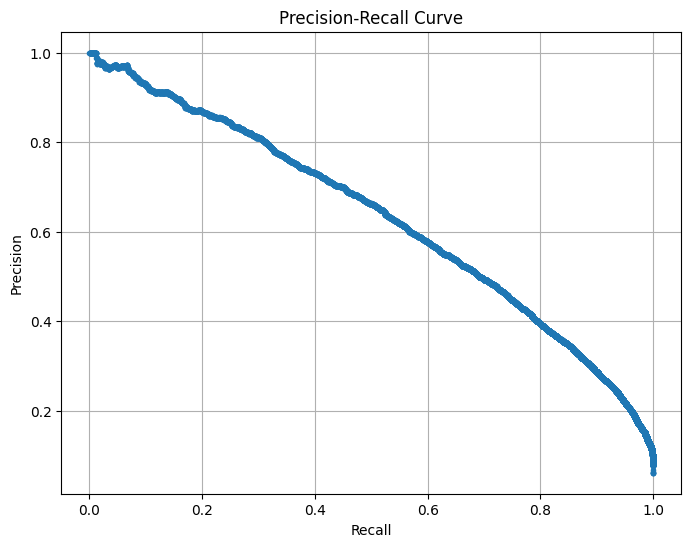

In [52]:
# Make predictions using the best model
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Find the threshold that maximizes the F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
print("Best Threshold:", best_threshold)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

In [53]:
# Apply the best threshold to make binary predictions
y_pred_binary = (y_prob >= best_threshold).astype(int)

# Create a classification report based on the best threshold
classification_rep = classification_report(y_test, y_pred_binary)

# Compute and display the confusion matrix based on the best threshold
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Print the results

print("Classification Report (Custom):\n", classification_rep)
print("Confusion Matrix :\n", conf_matrix)

Classification Report (Custom):
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     93575
           1       0.56      0.62      0.59      6186

    accuracy                           0.95     99761
   macro avg       0.77      0.79      0.78     99761
weighted avg       0.95      0.95      0.95     99761

Confusion Matrix :
 [[90638  2937]
 [ 2374  3812]]
